# Import Necessary Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For word cloud
from wordcloud import WordCloud

# For sentiment analysis
from textblob import TextBlob

# Load the CSV File

In [22]:
# Replace 'hotel_reviews.csv' with the actual filename
df = pd.read_csv('reviews.csv')

# Explore the Data

In [23]:
# Display the first few rows
print(df.head())

# Get summary statistics
print(df.describe())

           Review date Guest name  Reservation number   
0  2021-10-02 16:22:53       Chon        2.188979e+09  \
1  2021-10-12 09:35:29       Chon        2.421043e+09   
2  2021-10-20 20:46:09     Zakiie        3.886500e+09   
3  2021-11-13 21:33:26    Jackson        2.148053e+09   
4  2021-11-13 21:34:16    Jackson        2.614378e+09   

                                        Review title   
0  A comfortable stay in a quiet suburb nestled a...  \
1                                                NaN   
2                                   Below average...   
3                                                NaN   
4                                                NaN   

                                     Positive review   
0  This is my "go-to" home away from home if I ne...  \
1  Thank you excellent management and staff for a...   
2  Own private bathroom. Very small though. \nGoo...   
3                                                NaN   
4                                       

# Clean the Data

## Handle missing values

In [24]:
df.fillna(0, inplace=True)  # Replace missing values with 0

## Convert data types

In [25]:
df['Review date'] = pd.to_datetime(df['Review date'])  # Convert 'Review date' to datetime format

# Analyze Review Scores

## Distribution of review scores

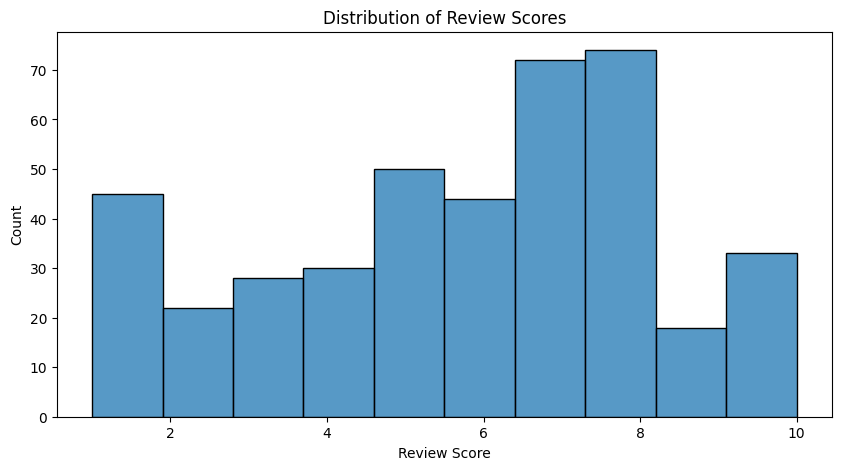

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Review score'], bins=10)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

## Average review score

In [27]:
average_score = df['Review score'].mean()
print("Average review score:", average_score)

Average review score: 5.757211538461538


# Analyze Positive and Negative Reviews

In [28]:
invalid_rows = df[df['Positive review'].apply(lambda x: not isinstance(x, str))]
print(invalid_rows)
df['Positive review'] = df['Positive review'].astype(str)
df['Positive review'].fillna('', inplace=True)  # Fill missing values with empty strings
# or
df.dropna(subset=['Positive review'], inplace=True)  # Remove rows with missing values

            Review date    Guest name  Reservation number Review title   
3   2021-11-13 21:33:26       Jackson        2.148053e+09            0  \
4   2021-11-13 21:34:16       Jackson        2.614378e+09            0   
6   2021-12-10 03:05:19     Chin Chih        3.161494e+09            0   
7   2021-12-26 11:02:40        Tiahla        3.407459e+09            0   
9   2022-01-03 17:52:11        justin        2.533159e+09            0   
..                  ...           ...                 ...          ...   
406 2024-06-20 13:02:56    Jacqueline        4.906371e+09            0   
407 2024-06-27 07:41:17  Nydia Alzena        4.916987e+09            0   
409 2024-07-01 09:40:00         Colin        4.579488e+09            0   
411 2024-07-07 16:05:34       THI YEN        4.861581e+09            0   
414 2024-07-17 00:10:18        Louise        4.699547e+09            0   

    Positive review                Negative review  Review score  Staff   
3                 0                 

In [29]:
invalid_rows = df[df['Negative review'].apply(lambda x: not isinstance(x, str))]
print(invalid_rows)
df['Negative review'] = df['Negative review'].astype(str)
df['Negative review'].fillna('', inplace=True)  # Fill missing values with empty strings
# or
df.dropna(subset=['Negative review'], inplace=True)  # Remove rows with missing values

            Review date     Guest name  Reservation number   
0   2021-10-02 16:22:53           Chon        2.188979e+09  \
1   2021-10-12 09:35:29           Chon        2.421043e+09   
3   2021-11-13 21:33:26        Jackson        2.148053e+09   
4   2021-11-13 21:34:16        Jackson        2.614378e+09   
6   2021-12-10 03:05:19      Chin Chih        3.161494e+09   
..                  ...            ...                 ...   
406 2024-06-20 13:02:56     Jacqueline        4.906371e+09   
407 2024-06-27 07:41:17   Nydia Alzena        4.916987e+09   
411 2024-07-07 16:05:34        THI YEN        4.861581e+09   
414 2024-07-17 00:10:18         Louise        4.699547e+09   
415 2024-07-19 11:03:48  Marco Aurélio        4.511721e+09   

                                          Review title   
0    A comfortable stay in a quiet suburb nestled a...  \
1                                                    0   
3                                                    0   
4                      

## Word clouds for positive and negative reviews

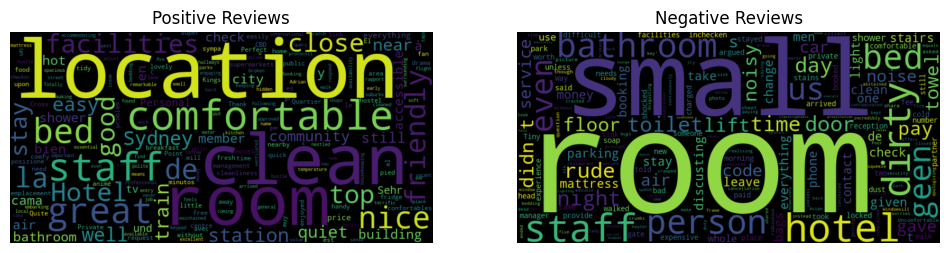

In [30]:
# Positive reviews
positive_words = ' '.join(df[df['Review score'] >= 8]['Positive review'])
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_words)

# Negative reviews
negative_words = ' '.join(df[df['Review score'] <= 2]['Negative review'])
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_words)

# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()

# Analyze Sentiment Analysis
## Calculate sentiment polarity and subjectivity

In [31]:
df['Sentiment'] = df['Positive review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Positive review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

## Visualize sentiment distribution

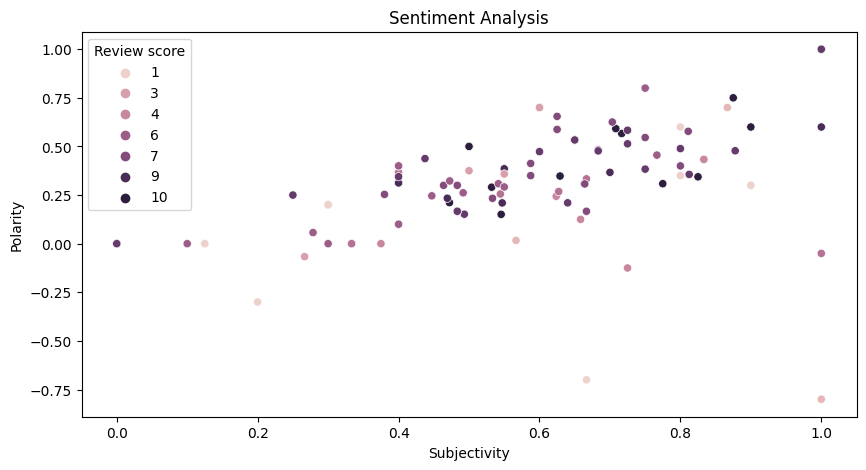

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Subjectivity'], y=df['Sentiment'], hue=df['Review score'])
plt.title('Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.show()

# Analyze Other Review Aspects
## Correlation between review scores and other aspects (e.g., cleanliness, location)

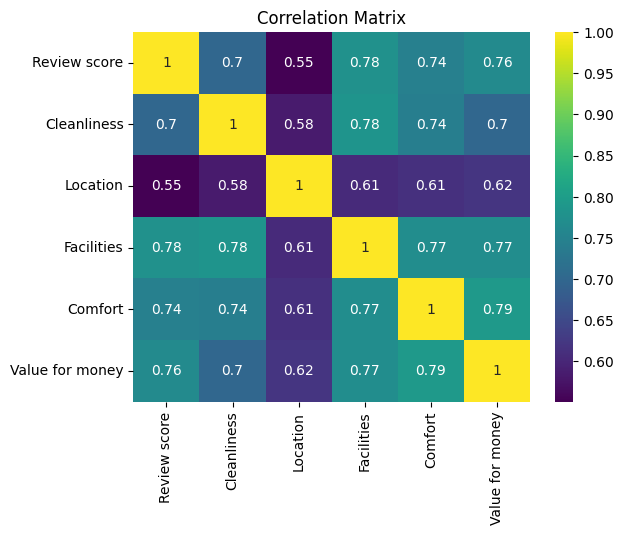

In [33]:
correlation_matrix = df[['Review score', 'Cleanliness', 'Location', 'Facilities', 'Comfort', 'Value for money']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## TextBlob for sentiment analysis

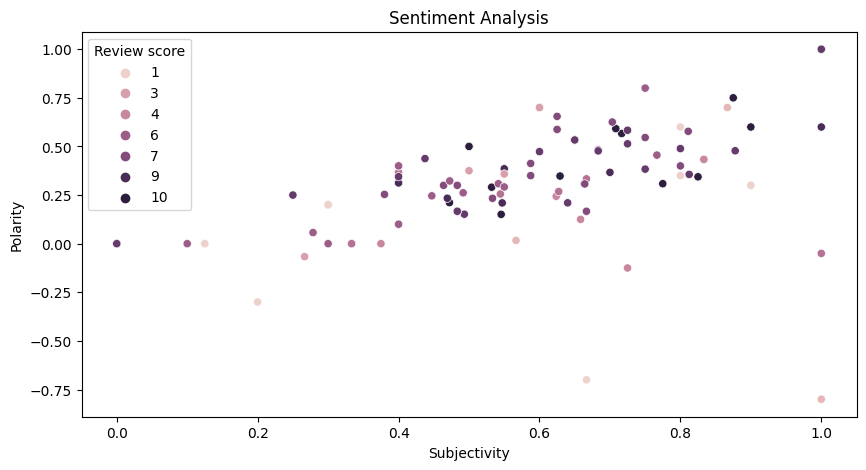

In [34]:
# Import necessary libraries
from textblob import TextBlob

# Calculate sentiment polarity and subjectivity
df['Sentiment'] = df['Positive review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Positive review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Visualize sentiment distribution
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Subjectivity'], y=df['Sentiment'], hue=df['Review score'])
plt.title('Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.show()